In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("headbrain.csv")

In [5]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
df.isnull().mean()

Gender                 0.0
Age Range              0.0
Head Size(cm^3)        0.0
Brain Weight(grams)    0.0
dtype: float64

<Axes: >

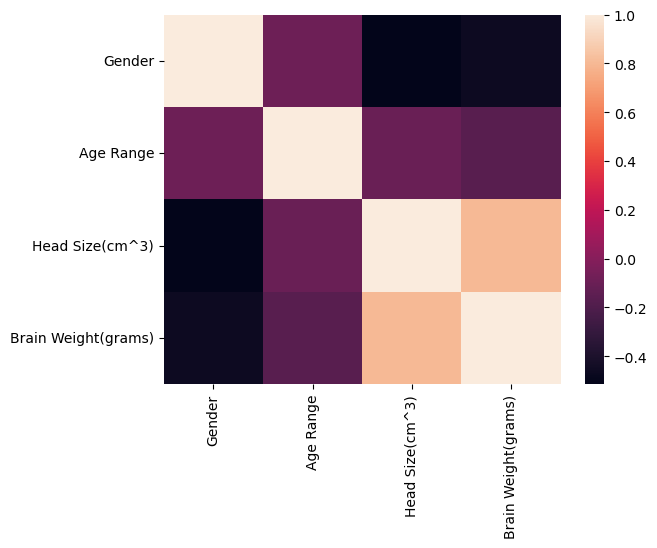

In [7]:
sns.heatmap(df.corr())

In [8]:
skewness = df.skew()
skewness

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\1778875146.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gender'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\1778875146.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age Range'])
C:\Users\Surya Reddy\AppData\

<Axes: xlabel='Brain Weight(grams)', ylabel='Density'>

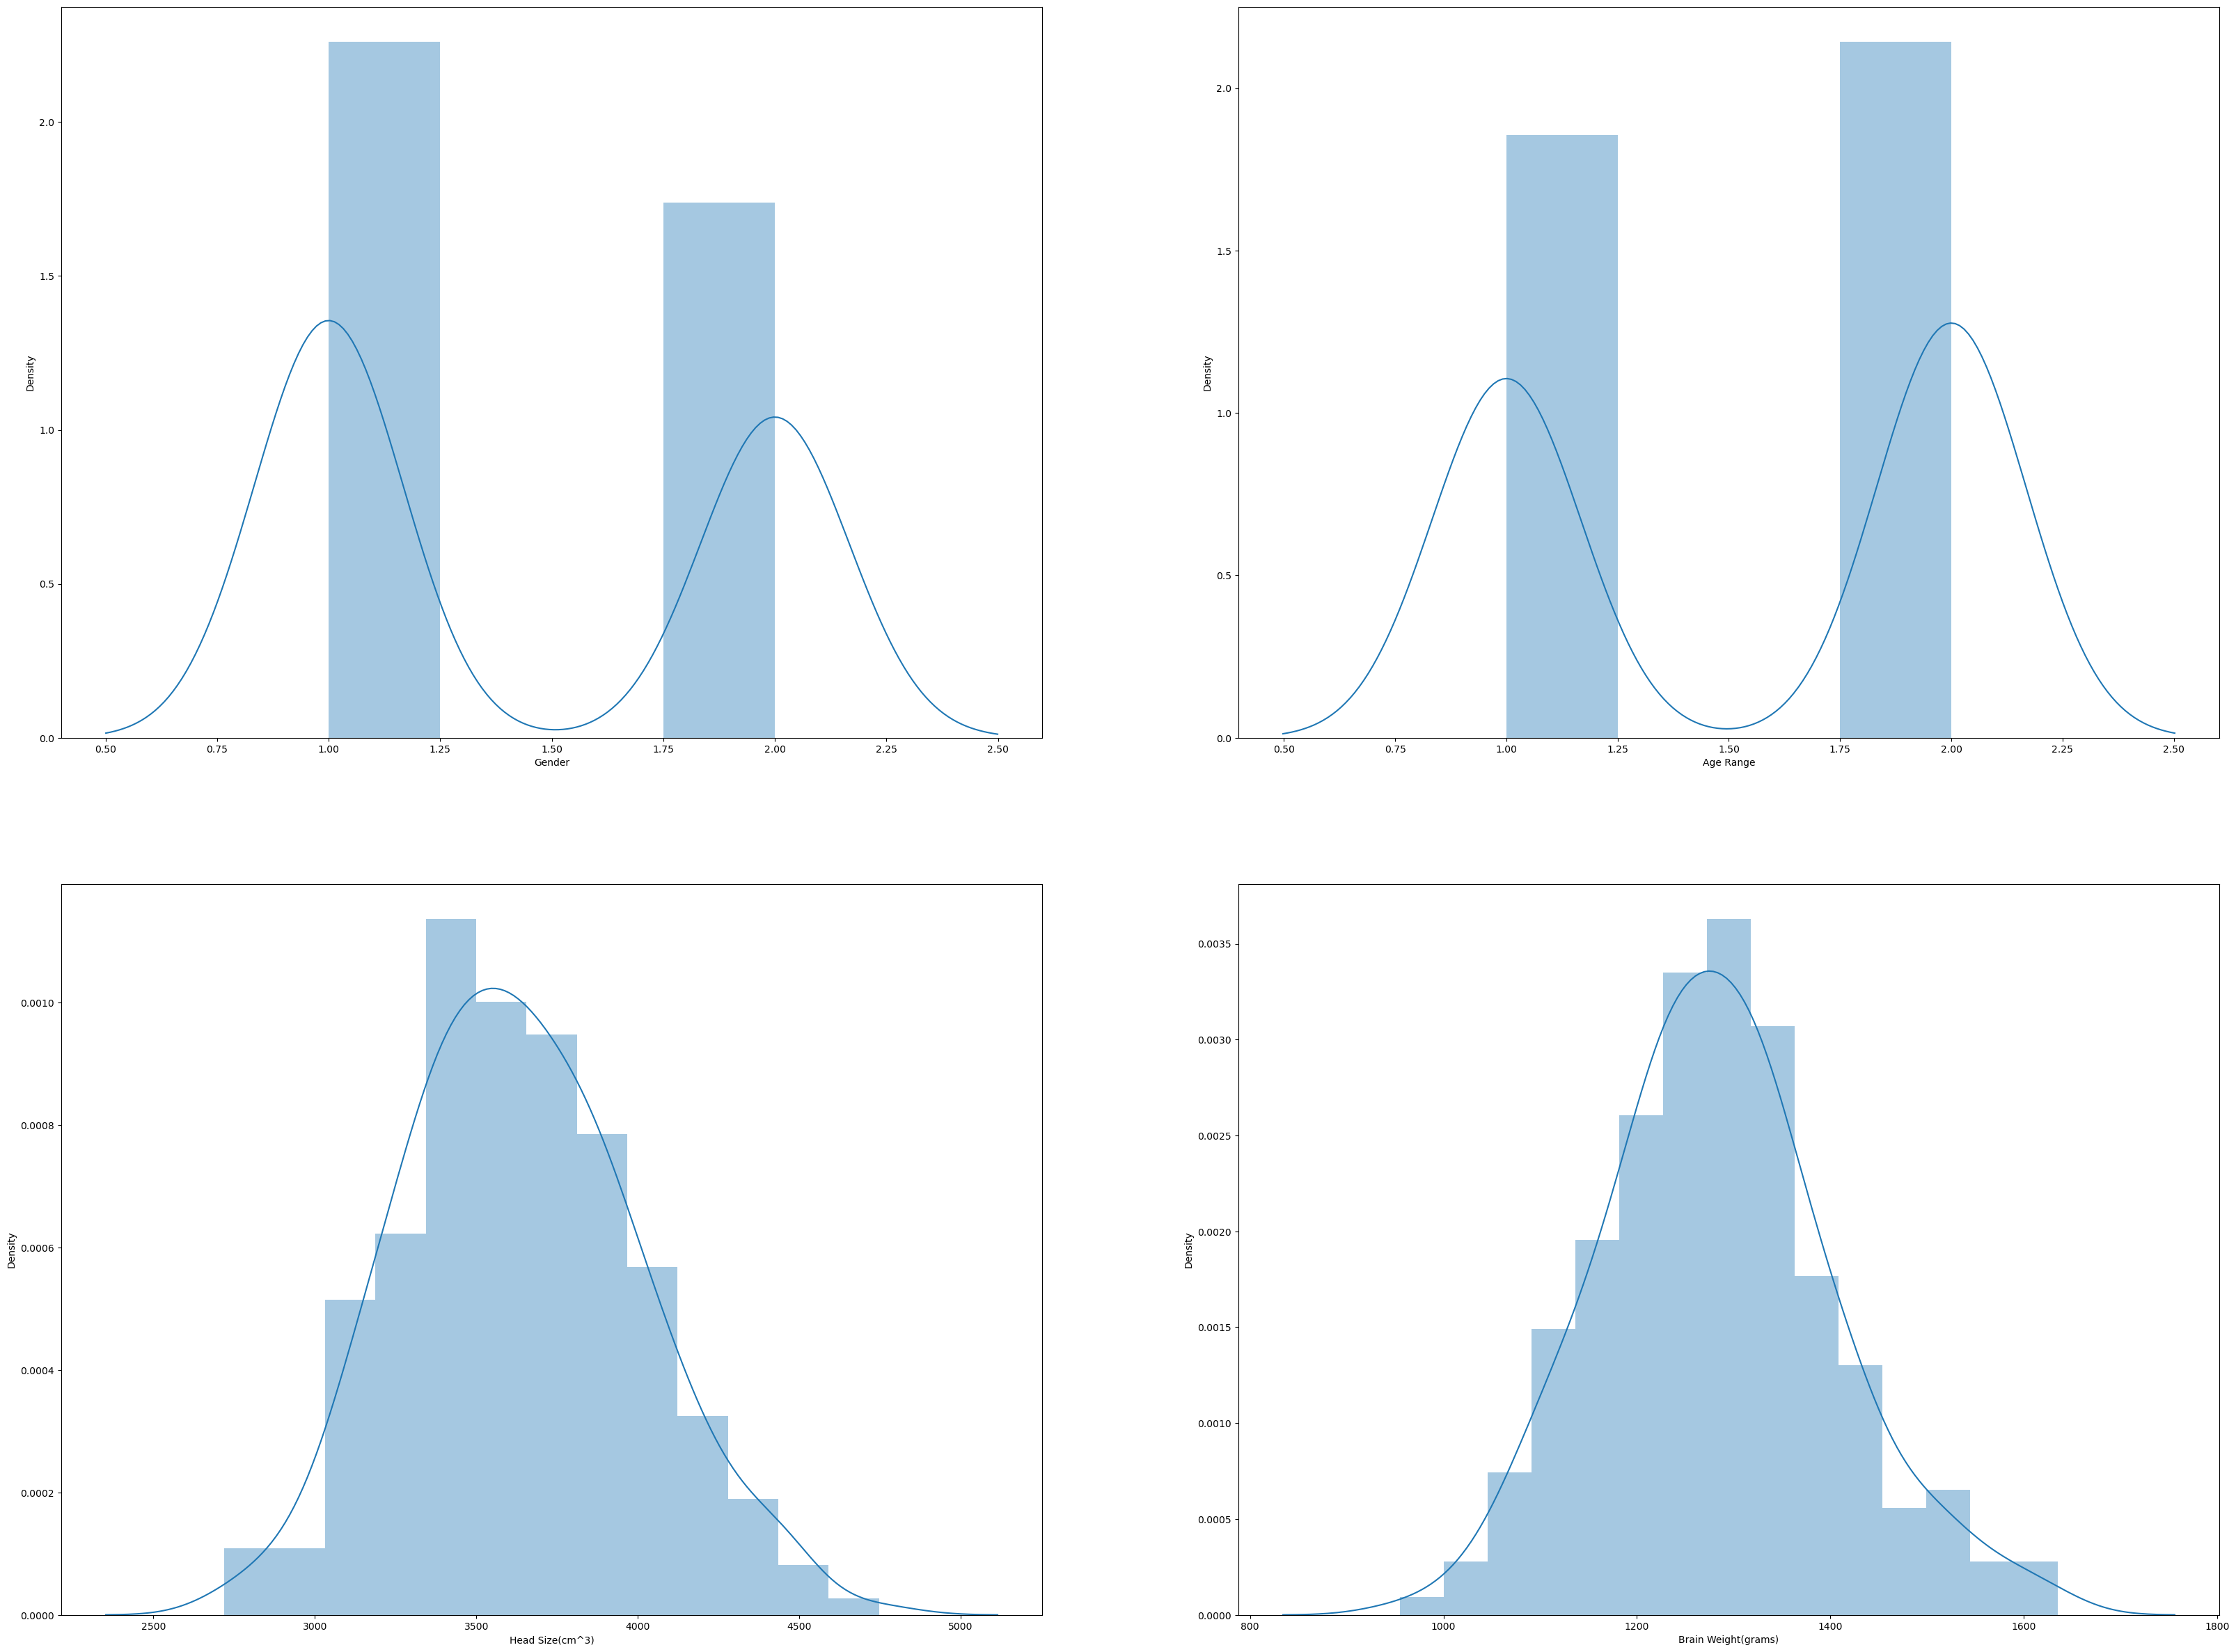

In [9]:
plt.figure(figsize=(40,30))
plt.subplot(2,2,1)
sns.distplot(df['Gender'])


plt.subplot(2,2,2)
sns.distplot(df['Age Range'])

plt.subplot(2,2,3)
sns.distplot(df['Head Size(cm^3)'])


plt.subplot(2,2,4)
sns.distplot(df['Brain Weight(grams)'])


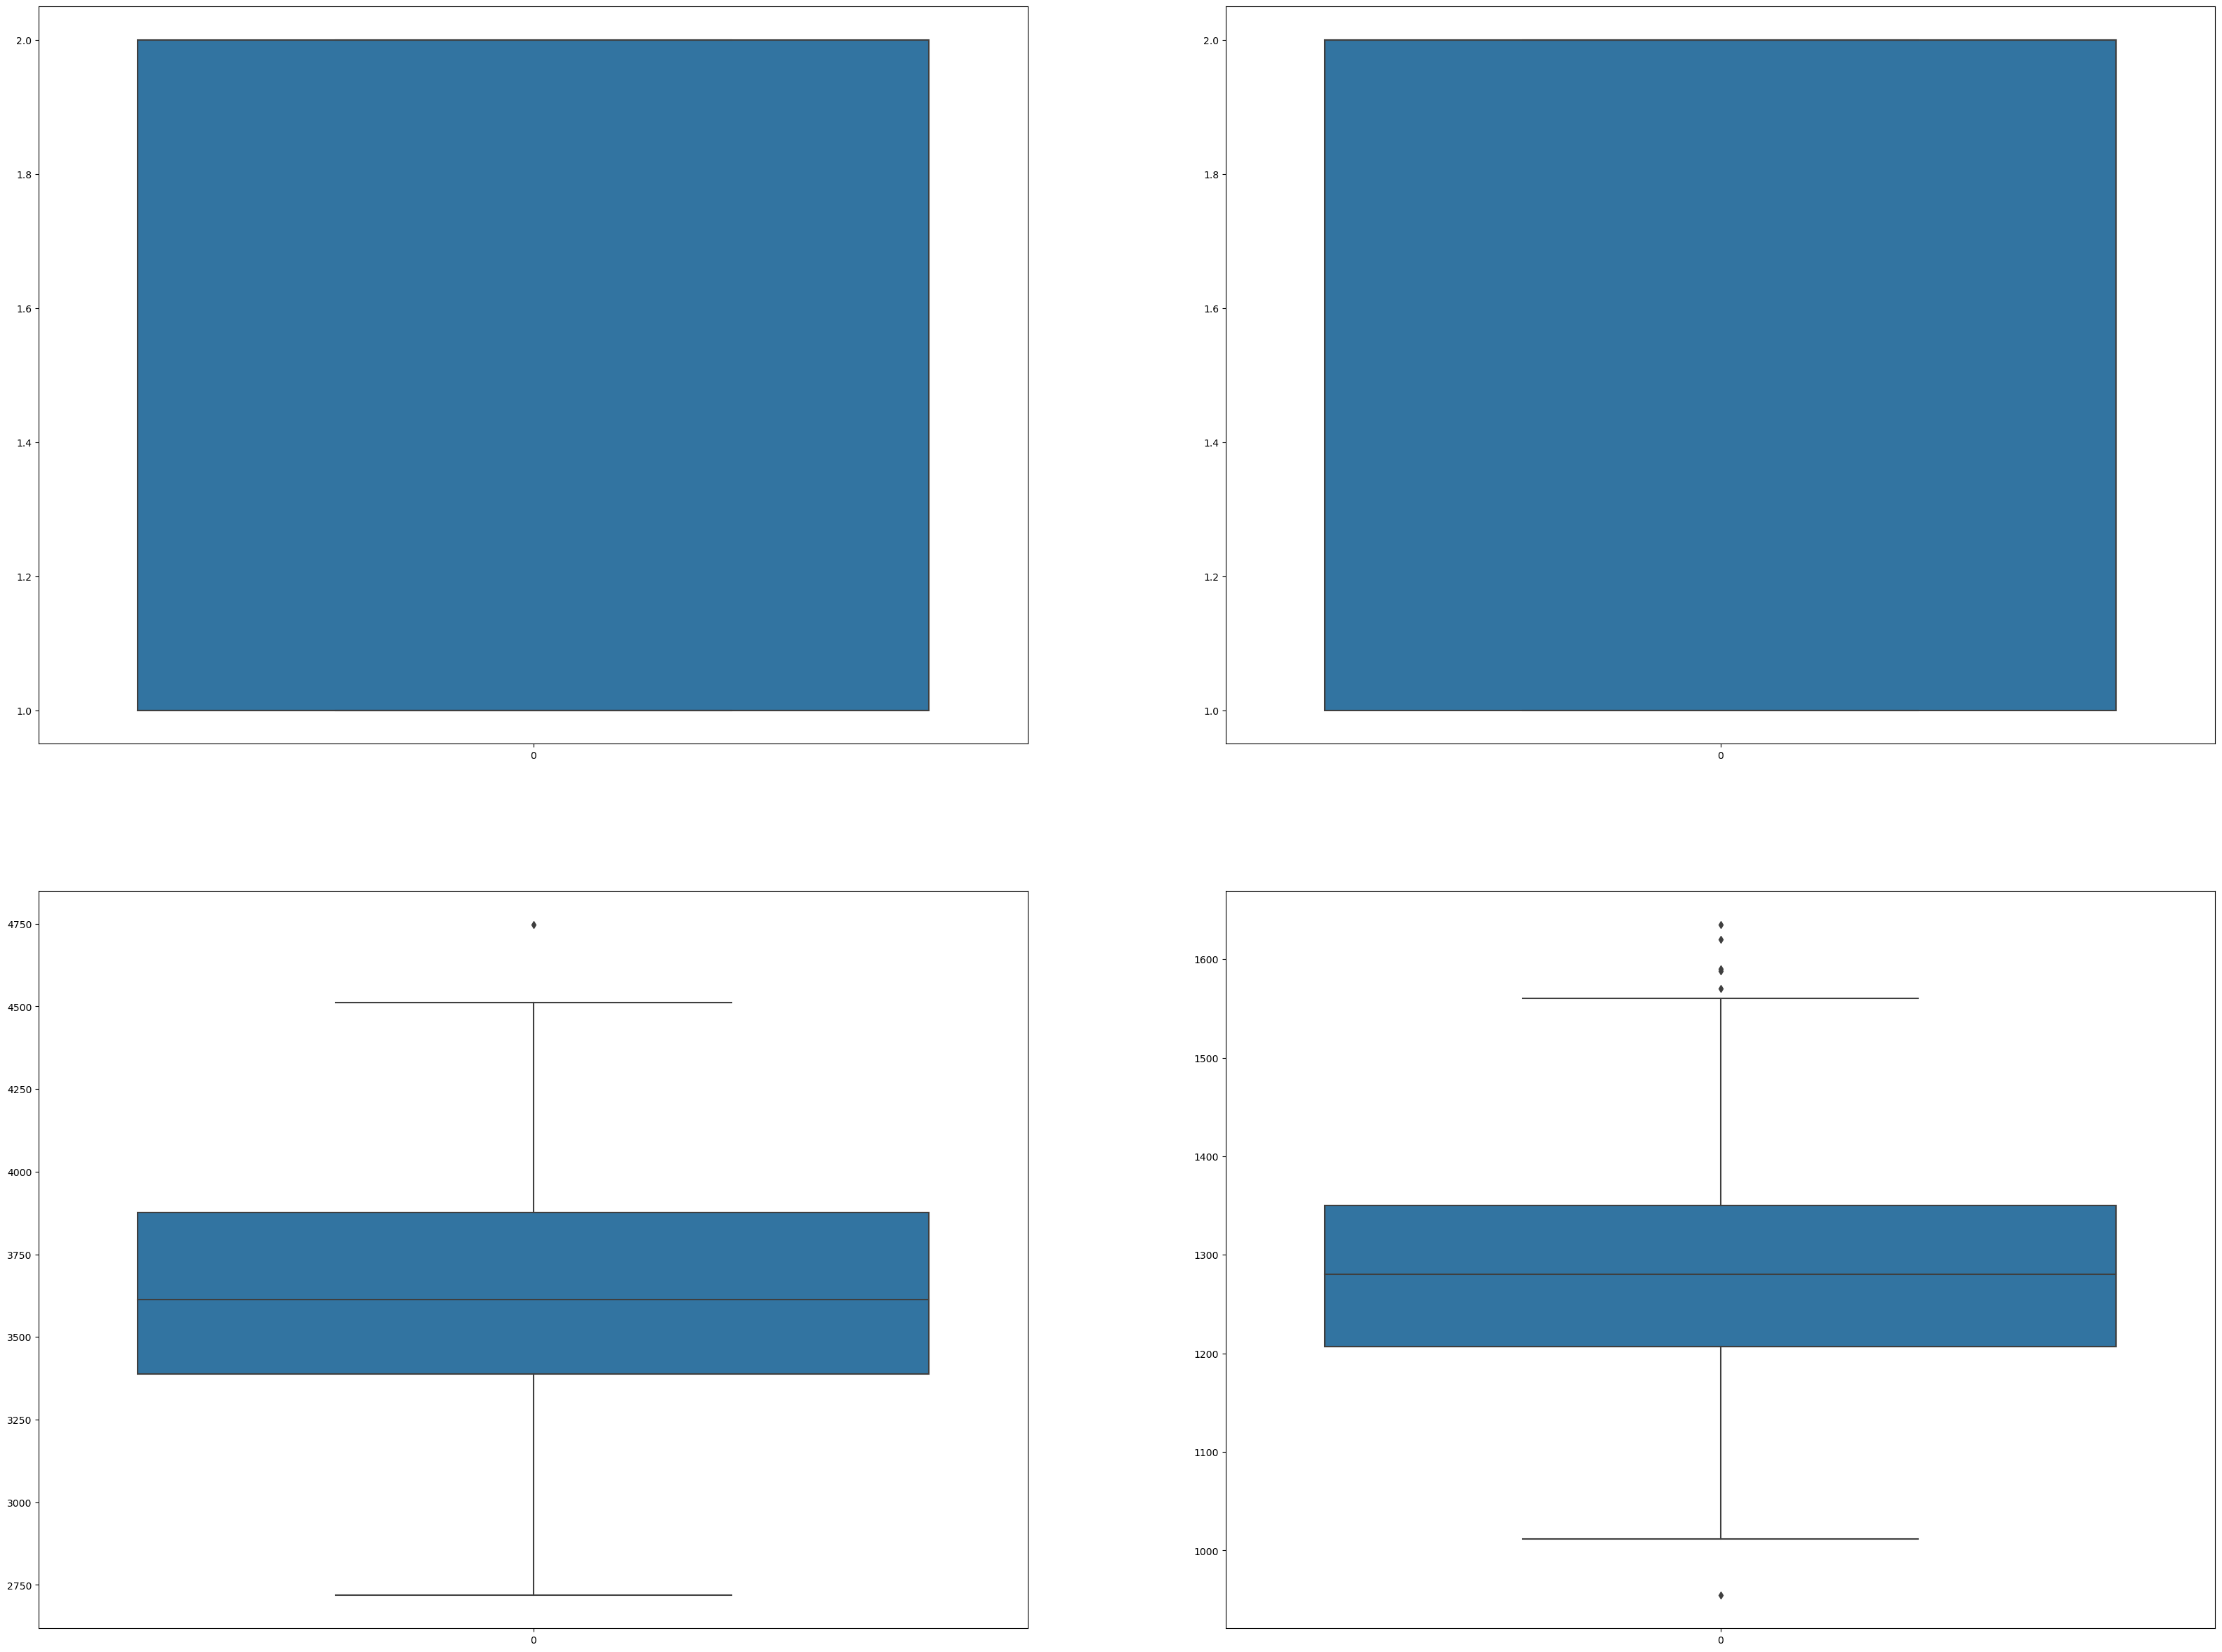

In [10]:
plt.figure(figsize=(40,30))

plt.subplot(2,2,1)
sns.boxplot(df['Gender'])


plt.subplot(2,2,2)
sns.boxplot(df['Age Range'])

plt.subplot(2,2,3)
sns.boxplot(df['Head Size(cm^3)'])

plt.subplot(2,2,4)
sns.boxplot(df['Brain Weight(grams)'])
plt.show()

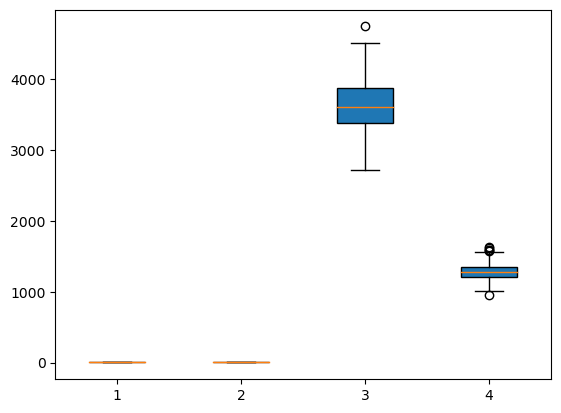

In [11]:
plt.boxplot(df,vert=True,patch_artist=True);

In [12]:
df['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

<Axes: >

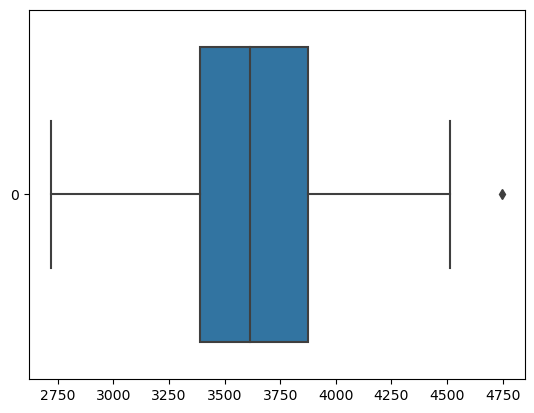

In [13]:
sns.boxplot(df['Head Size(cm^3)'],orient='h')

In [14]:
#finding IQR
percentile25 = df['Head Size(cm^3)'].quantile(0.25)
percentile75 = df['Head Size(cm^3)'].quantile(0.75)

In [15]:
percentile25

3389.0

In [16]:
percentile75

3876.0

In [17]:
iqr = percentile75 - percentile25
iqr

487.0

In [18]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [19]:
print(upper_limit,lower_limit)

4606.5 2658.5


In [20]:
df[df['Head Size(cm^3)']>upper_limit]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
24,1,1,4747,1635


In [21]:
df[df['Head Size(cm^3)'] < lower_limit]

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)


In [22]:
new_df_cap = df.copy()
new_df_cap['Head Size(cm^3)'] = np.where(new_df_cap['Head Size(cm^3)']>upper_limit,upper_limit,np.where(new_df_cap['Head Size(cm^3)']<lower_limit,lower_limit,new_df_cap['Head Size(cm^3)']))

In [23]:
new_df_cap.shape

(237, 4)

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\3332655108.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Head Size(cm^3)'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\3332655108.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Head Size(cm^3)'])


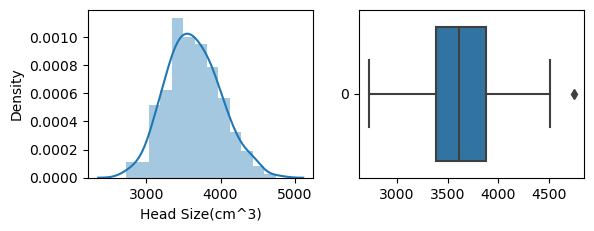

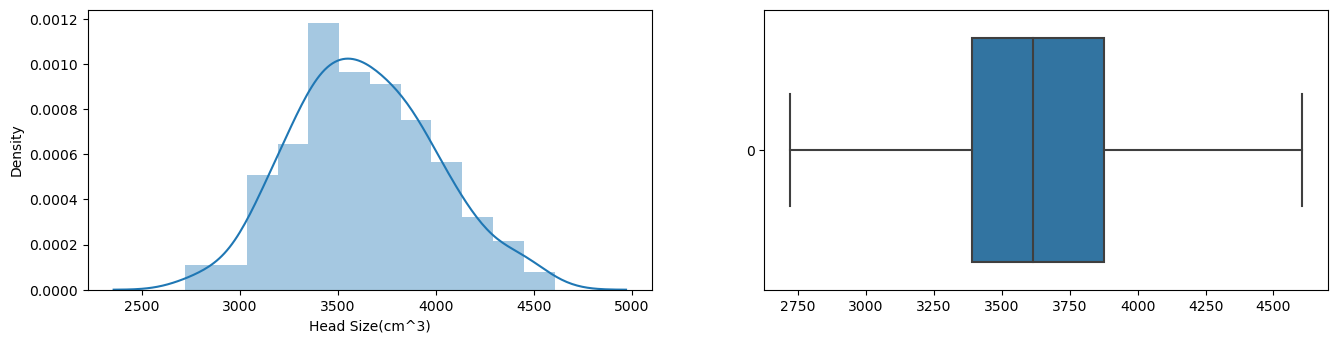

In [24]:
plt.subplot(2,2,1)
sns.distplot(df['Head Size(cm^3)'])

plt.subplot(2,2,2)
sns.boxplot(df['Head Size(cm^3)'],orient='h')

plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Head Size(cm^3)'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Head Size(cm^3)'],orient='h')
plt.show()

<Axes: >

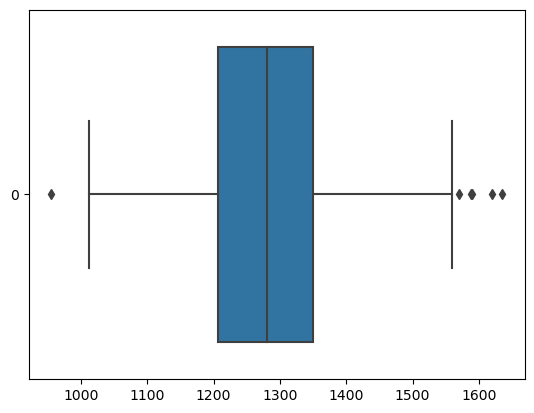

In [25]:
sns.boxplot(df['Brain Weight(grams)'],orient='h')

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\863859100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Brain Weight(grams)'])


<Axes: xlabel='Brain Weight(grams)', ylabel='Density'>

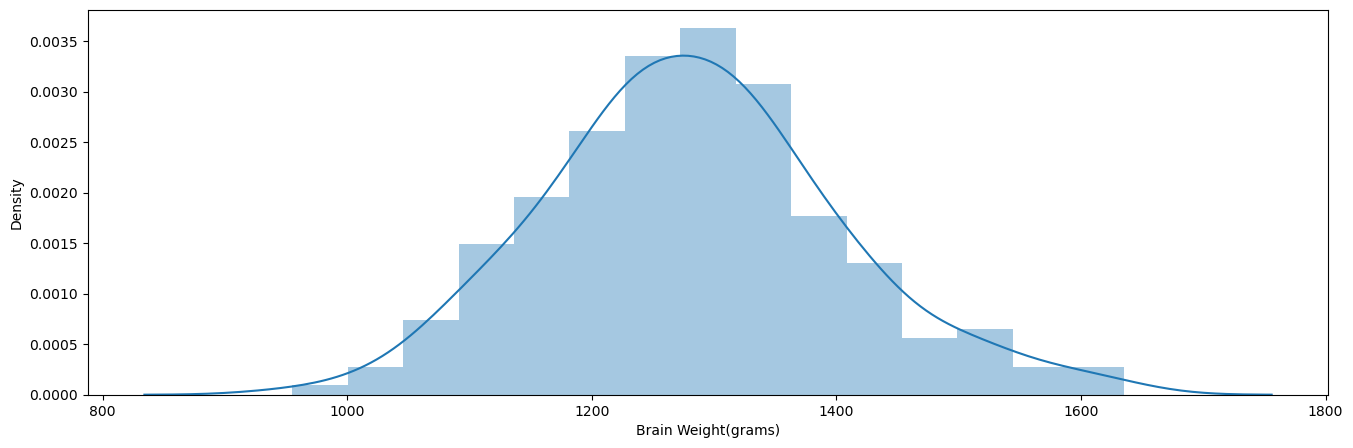

In [26]:
plt.figure(figsize=(16,5))
sns.distplot(df['Brain Weight(grams)'])

In [27]:
upper_limit =df['Brain Weight(grams)'].quantile(0.99)
lower_limit =df['Brain Weight(grams)'].quantile(0.01)

In [28]:
print(upper_limit,lower_limit)

1589.28 1023.8


In [29]:
new_df_per = df[(df['Brain Weight(grams)']<=(upper_limit - 29)) & (df['Brain Weight(grams)']>=lower_limit)]

In [30]:
new_df_per.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,229.000000,229.000000,229.000000,229.000000
mean,1.436681,1.532751,3631.305677,1279.689956
std,0.497061,0.500019,347.183357,107.990882
min,1.000000,1.000000,2773.000000,1027.000000
25%,1.000000,1.000000,3391.000000,1208.000000
50%,1.000000,2.000000,3613.000000,1280.000000
75%,2.000000,2.000000,3863.000000,1350.000000
max,2.000000,2.000000,4512.000000,1560.000000


In [31]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\2433376166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Brain Weight(grams)'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_4068\2433376166.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_per['Brain Weight(grams)']

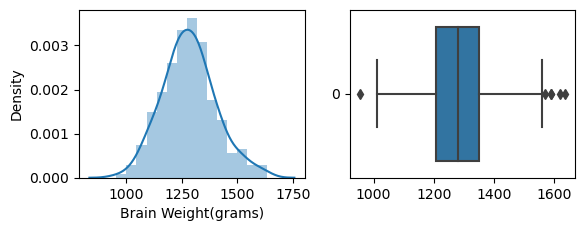

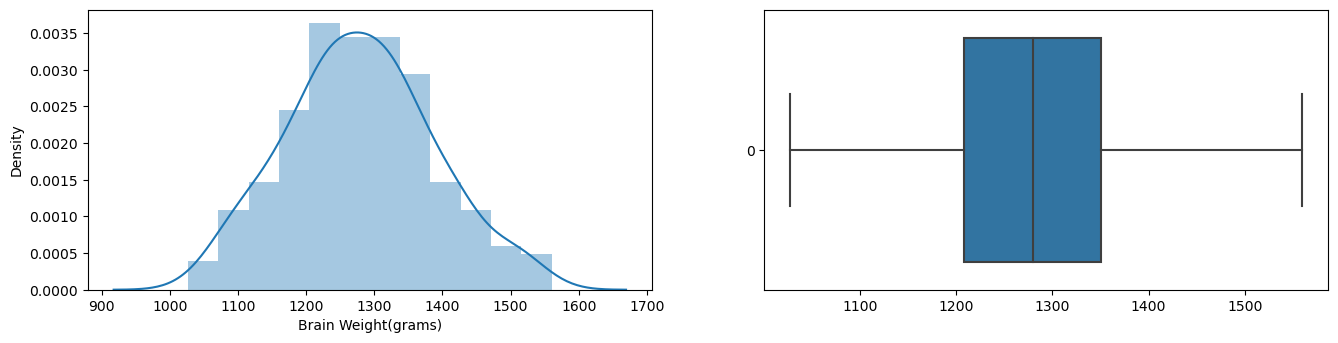

In [32]:
plt.subplot(2,2,1)
sns.distplot(df['Brain Weight(grams)'])

plt.subplot(2,2,2)
sns.boxplot(df['Brain Weight(grams)'],orient='h')

plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.distplot(new_df_per['Brain Weight(grams)'])

plt.subplot(2,2,4)
sns.boxplot(new_df_per['Brain Weight(grams)'],orient='h')
plt.show()

In [33]:
a= new_df_per['Brain Weight(grams)'] >1560
a.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [46]:
x = df.iloc[:,:3]
y = df.iloc[:,-1]

In [47]:
x.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)'], dtype='object')

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           237 non-null    int64
 1   Age Range        237 non-null    int64
 2   Head Size(cm^3)  237 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


In [49]:
x

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
...,...,...,...
232,2,2,3214
233,2,2,3394
234,2,2,3233
235,2,2,3352


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=4)

In [51]:
x_train.head()

,Gender,Age Range,Head Size(cm^3)
215,2,2,3156
144,2,1,3903
141,2,1,3530
108,1,2,3916
16,1,1,3497


In [52]:
#from sklearn.preprocessing import MinMaxScaler
#import pandas as pd

# Assuming x_train, x_test, y_train, and y_test are already defined

#scaler = MinMaxScaler()
#scaler1 = MinMaxScaler()

#x_train_scaler = scaler.fit_transform(x_train)
#x_test_scaler = scaler.transform(x_test)

# Reshape y_train and y_test to have the right dimensions
#y_train = pd.DataFrame(y_train)  # If y_train is not a DataFrame already

#y_train_reshaped = y_train.values.reshape(-1, 1)
##y_test_reshaped = y_test.values.reshape(-1, 1)

#y_train = scaler1.fit_transform(y_train_reshaped)
#y_test = scaler1.transform(y_test_reshaped)


In [53]:
#x_train = pd.DataFrame(x_train_scaler,columns = x_train.columns)
#x_test = pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [54]:
#y_train

Text(0, 0.5, 'Brain Weight')

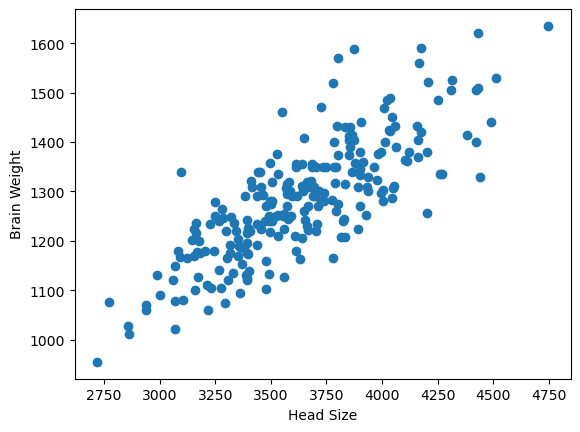

In [55]:
plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

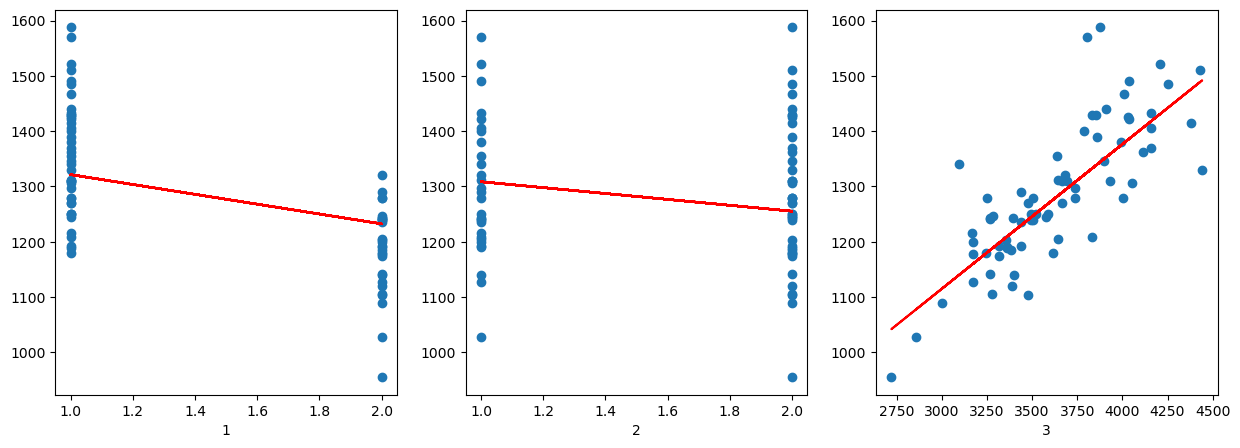

In [57]:
fig,axs = plt.subplots(1,3,figsize = (15,5))
for i in range(3):
    lr = LinearRegression()
    lr.fit(x_train.iloc[:,i:i+1],y_train)
    y_pred = lr.predict(x_test.iloc[:,i:i+1])
    axs[i].scatter(x_test.iloc[:,i],y_test)
    axs[i].plot(x_test.iloc[:,i],y_pred,color ='red')
    axs[i].set_xlabel(f'{i+1}')

In [58]:
y_pred = lr.predict(x_test.iloc[:,i:i+1])

In [59]:
r2_score(y_test, y_pred)

0.6375772920484148

In [60]:
# y = mx+c
m = lr.coef_ 
c= lr.intercept_

In [61]:
print(m,c) 

[0.26134863] 331.0280454988971


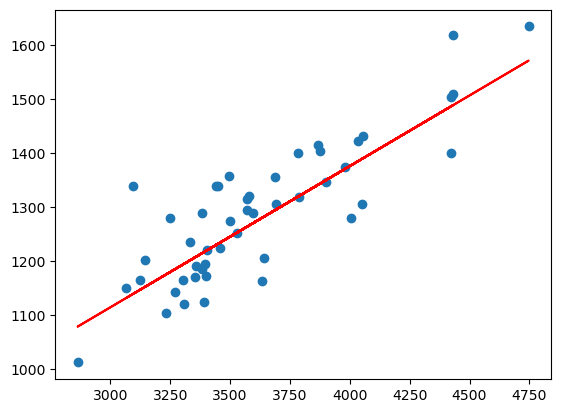

In [62]:
feature_index =2
select_feature = df.iloc[:, feature_index]
x_train,x_test,y_train,y_test = train_test_split(select_feature.values.reshape(-1,1),y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = 'red')

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
feature_index = 2
select_feature = df.iloc[:, feature_index]
x_train,x_test,y_train,y_test = train_test_split(select_feature.values.reshape(-1,1),y,test_size=0.2,random_state=42)

poly = PolynomialFeatures(degree=4)

In [65]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [66]:
#include bias parameter
lr = LinearRegression()

In [67]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [68]:
y_pred = lr.predict(x_test_trans)

In [69]:
y_pred

array([1249.40838131, 1349.76352922, 1271.77149893, 1219.04836182,
       1326.60794636, 1146.49696762, 1375.26747954, 1051.22106381,
       1269.30349888, 1216.2024082 , 1380.53383087, 1193.46876355,
       1327.12668916, 1300.75994943, 1275.60201707, 1237.95928591,
       1426.8622272 , 1302.09692355, 1195.50284383, 1446.83064467,
       1222.17152538, 1221.3205074 , 1258.00698788, 1173.17361583,
       1233.74800963, 1183.52666594, 1269.30349888, 1447.18917252,
       1219.90089123, 1446.76872484, 1390.72160994, 1288.65231426,
       1207.91107154, 1130.83279129, 1447.18917252, 1347.26820954,
       1235.99556898, 1121.86723627, 1216.77212019, 1392.0138233 ,
       1177.92235115, 1387.01308374, 1248.85193477, 1355.44993352,
       1285.94448541, 1209.63133143, 1202.73442544, 1139.96860823])

In [70]:
r2_score(y_test,y_pred)

0.6498645283960431

Text(0, 0.5, 'Brain Weight')

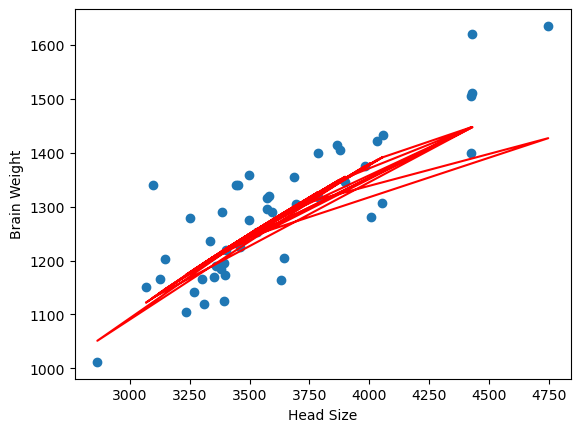

In [71]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = 'red')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
r = Ridge(alpha = 0.0001)

In [73]:
r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [74]:
y_pred1 = r.predict(x_test) 

In [75]:
print("R2 score",r2_score(y_test,y_pred1)*100)
print("RSME",np.sqrt(mean_squared_error(y_test,y_pred1))*100)

R2 score 71.49168473010769
RSME 6835.234853057982


In [76]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import PolynomialFeatures

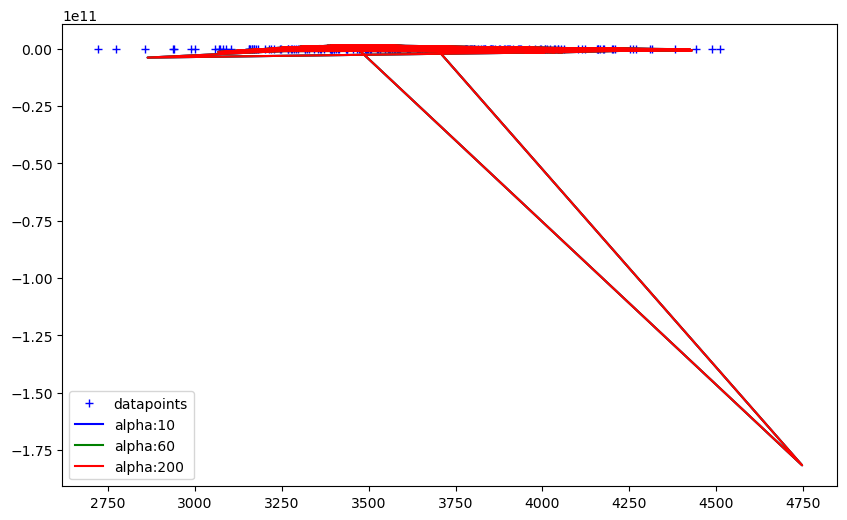

In [77]:
def get_preds_ridge(x_train,y_train,alpha):
    model = Pipeline([('poly_feets', PolynomialFeatures(degree = 16)),('ridge', Ridge(alpha = alpha))])
    model.fit(x_train, y_train)
    return model.predict(x_test)
alphas = [10,60,200]
cs = ['b','g','r']
plt.figure(figsize = (10,6))
plt.plot(x_train,y_train,'b+',label= 'datapoints')
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x_train,y_train,alpha)
    plt.plot(x_test,preds,c,label='alpha:{}'.format(alpha))
plt.legend()
plt.show()

In [78]:
x_test

array([[3499],
       [3876],
       [3580],
       [3391],
       [3785],
       [3145],
       [3982],
       [2864],
       [3571],
       [3381],
       [4005],
       [3302],
       [3787],
       [3687],
       [3594],
       [3458],
       [4747],
       [3692],
       [3309],
       [4424],
       [3402],
       [3399],
       [3530],
       [3233],
       [3443],
       [3268],
       [3571],
       [4430],
       [3394],
       [4423],
       [4051],
       [3642],
       [3352],
       [3095],
       [4430],
       [3866],
       [3451],
       [3067],
       [3383],
       [4057],
       [3249],
       [4034],
       [3497],
       [3899],
       [3632],
       [3358],
       [3334],
       [3124]], dtype=int64)

In [79]:
class batchgd:
    def __init__(self,learning_rate = 0.1,epochs = 9):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,x_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        for i in range(self.epochs):
            y_hat = np.dot(x_train, self.coef_) + self.intercept_
            intercept_der = -2*np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr*intercept_der)

            coef_der = -2*np.dot((y_train - y_hat),x_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
        print(self.intercept_)
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [80]:
gd = batchgd(learning_rate=0.1, epochs=9)
gd.fit(x_train,y_train)

-1.9955019386237557e+72


In [81]:
y_pred = gd.predict(x_test)

In [82]:
y_pred

array([-4.84604305e+81, -5.36818029e+81, -4.95822638e+81, -4.69646527e+81,
       -5.24214717e+81, -4.35576033e+81, -5.51498811e+81, -3.96658111e+81,
       -4.94576157e+81, -4.68261547e+81, -5.54684264e+81, -4.57320210e+81,
       -5.24491712e+81, -5.10641918e+81, -4.97761609e+81, -4.78925889e+81,
       -6.57449738e+81, -5.11334408e+81, -4.58289695e+81, -6.12714902e+81,
       -4.71170004e+81, -4.70754510e+81, -4.88897741e+81, -4.47763852e+81,
       -4.76848420e+81, -4.52611280e+81, -4.94576157e+81, -6.13545890e+81,
       -4.70062021e+81, -6.12576404e+81, -5.61055169e+81, -5.04409511e+81,
       -4.64245107e+81, -4.28651135e+81, -6.13545890e+81, -5.35433050e+81,
       -4.77956403e+81, -4.24773193e+81, -4.68538543e+81, -5.61886157e+81,
       -4.49979819e+81, -5.58700704e+81, -4.84327309e+81, -5.40003482e+81,
       -5.03024531e+81, -4.65076095e+81, -4.61752144e+81, -4.32667576e+81])

In [83]:
r2_score(y_test, y_pred)

-1.5518079717438033e+159

In [84]:
class stochasticgd:
    def __init__(self,learning_rate = 0.1,epochs = 9):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,x_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0,x_train.shape[0])
                y_hat = np.dot(x_train[idx], self.coef_) + self.intercept_
                intercept_der = -2*(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr*intercept_der)

                coef_der = -2*np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        print(self.intercept_)
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [85]:
#sd = stochasticgd(learning_rate=0.01, epochs=100)
#sd.fit(x_train,y_train)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
rt = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 5)

In [90]:
rt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [91]:
y_pred = rt.predict(x_test)
r2_score(y_test,y_pred)

0.5776162986840923

In [92]:
from sklearn.tree import plot_tree

[Text(0.43028846153846156, 0.9166666666666666, 'x[2] <= 3410.5\nabsolute_error = 88.175\nsamples = 189\nvalue = 1280.0'),
 Text(0.16826923076923078, 0.75, 'x[2] <= 3076.5\nabsolute_error = 59.232\nsamples = 56\nvalue = 1179.0'),
 Text(0.057692307692307696, 0.5833333333333334, 'x[2] <= 2746.5\nabsolute_error = 40.625\nsamples = 8\nvalue = 1065.0'),
 Text(0.038461538461538464, 0.4166666666666667, 'absolute_error = 0.0\nsamples = 1\nvalue = 955.0'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[2] <= 3003.0\nabsolute_error = 30.0\nsamples = 7\nvalue = 1070.0'),
 Text(0.038461538461538464, 0.25, 'x[2] <= 2818.5\nabsolute_error = 18.5\nsamples = 4\nvalue = 1065.0'),
 Text(0.019230769230769232, 0.08333333333333333, 'absolute_error = 0.0\nsamples = 1\nvalue = 1076.0'),
 Text(0.057692307692307696, 0.08333333333333333, 'absolute_error = 19.333\nsamples = 3\nvalue = 1060.0'),
 Text(0.11538461538461539, 0.25, 'x[2] <= 3068.0\nabsolute_error = 42.667\nsamples = 3\nvalue = 1078.0'),
 Text(0.096

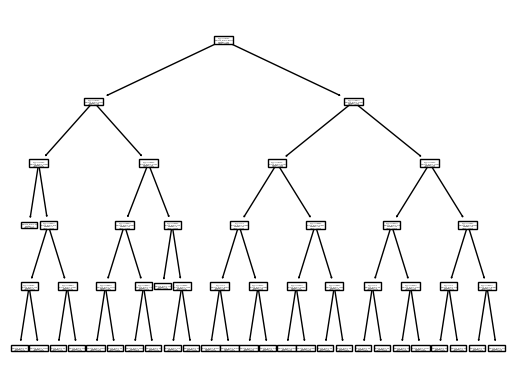

In [93]:
plot_tree(rt)

In [94]:
for importance,name in sorted(zip(rt.feature_importances_,x_train.columns),reverse=True):
    print(name,importance)

Head Size(cm^3) 0.9529845586540677
Age Range 0.02903894906660518
Gender 0.017976492279327058


In [95]:
import graphviz.backend as be

In [96]:
from dtreeviz.trees import dtreeviz
from IPython.display import Image,display_svg,SVG

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\Surya Reddy\AppData\Roaming\Python\Python310\site-packages\dtreeviz\trees.py)

In [ ]:
viz = dtreeviz(rt,x_train,y_train,target_name='Brain Weight(grams)',feature_names = rt.feature_names)

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    rt,
    x_train,
    y_train,
    target_name='Brain Weight(grams)',
    feature_names=rt.feature_names
)


In [ ]:
x_train

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gb_regressor.fit(x_train, y_train)


y_pred = gb_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(r2_score(y_test, y_pred))

In [97]:
y_train

126    1125
210    1070
111    1250
59     1222
185    1205
       ... 
184    1160
165    1180
7      1255
219    1130
70     1468
Name: Brain Weight(grams), Length: 189, dtype: int64

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
knn = KNeighborsRegressor(n_neighbors=5)

In [100]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [101]:
print(r2_score(y_test, y_pred))

0.5776162986840923


In [ ]:
#df

In [ ]:
#plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])

In [ ]:
#plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])

In [ ]:
#df['pred1'] = df['Brain Weight(grams)'].mean()

In [ ]:
#df

In [ ]:
#df['res1'] = df['Brain Weight(grams)'] - df['pred1'] 

In [ ]:
#df

In [ ]:
#plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])
#plt.plot(df['Head Size(cm^3)'],df['pred1'],color = 'red')

In [ ]:
#tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [ ]:
#tree1.fit(df['Head Size(cm^3)'].values.reshape(-1, 1),df['res1'].values)

In [ ]:
#plot_tree(tree1)
#plt.show()

In [ ]:
#x_test1 = np.array(x_test['Head Size(cm^3)'])

In [ ]:
#x_test1

In [ ]:
#df['y_pred2'] = 1282.873 + pd.DataFrame(tree1.predict(x_test1.reshape(-1, 1)))

In [ ]:
#plot_tree(pd.DataFrame(tree1.predict(x_test1.reshape(-1, 1)
#plt.show()

In [ ]:
#df

In [ ]:
#type(x_test1)

In [ ]:
#plt.plot(x_test1,y_pred2,linewidth=2,color = 'red')
#plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])